<a href="https://colab.research.google.com/github/AfamO/ghw-spam-detection/blob/main/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAM DETECTION USING NAIVE BAYES AND SVM ALGORTHMS

In [ ]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split;
from sklearn.feature_extraction.text import CountVectorizer;
from sklearn.naive_bayes import MultinomialNB;
from sklearn.svm import SVC;
from sklearn.metrics import accuracy_score;


#### Read data

In [ ]:
data = pd.read_csv("SPAM text message 20170820 - Data.csv");
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### check the shape and do basic EDA

In [ ]:
data.shape

(5572, 2)

In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

#### Check the percentage

In [ ]:
(data['Category'].value_counts()/len(data))*100

ham     86.593683
spam    13.406317
Name: Category, dtype: float64

#### This is obviously an imbalanced dataset, tilting more towards `ham-not spam` than to `spam`. However, we will leave out Feature Engineering for now

In [ ]:
data.isna().sum()

Category    0
Message     0
dtype: int64

#### So, there are no cases of missing values.

#### Let's do further and more  extensive exploration of the dataset

In [ ]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
top_freq_message=data[data['Message']=="Sorry, I'll call later"]

In [ ]:
top_freq_message

,Category,Message
80,ham,"Sorry, I'll call later"
223,ham,"Sorry, I'll call later"
339,ham,"Sorry, I'll call later"
444,ham,"Sorry, I'll call later"
702,ham,"Sorry, I'll call later"
768,ham,"Sorry, I'll call later"
1132,ham,"Sorry, I'll call later"
1152,ham,"Sorry, I'll call later"
1485,ham,"Sorry, I'll call later"
1585,ham,"Sorry, I'll call later"


In [ ]:
top_freq_message.shape

(30, 2)

#### split the dataset into training and test sets

In [ ]:
x_train, x_test = train_test_split(data, test_size=0.2)
x_train

,Category,Message
568,ham,"So anyways, you can just go to your gym or wha..."
2793,ham,Well there's still a bit left if you guys want...
224,ham,U say leh... Of course nothing happen lar. Not...
4818,ham,Me too. Mark is taking forever to pick up my p...
4389,ham,"see you then, we're all christmassy here!"
...,...,...
3901,ham,Okie
4732,ham,K:)eng rocking in ashes:)
1166,ham,"Haha yeah I see that now, be there in a sec"
350,ham,Just checking in on you. Really do miss seeing...


In [ ]:
x_test

,Category,Message
1729,ham,As per your request 'Maangalyam (Alaipayuthe)'...
1280,ham,Waiting 4 my tv show 2 start lor... U leh stil...
1156,ham,"Sorry man, accidentally left my phone on silen..."
2143,ham,You see the requirements please
769,ham,I cant pick the phone right now. Pls send a me...
...,...,...
3214,ham,What's ur pin?
5294,spam,XMAS iscoming & ur awarded either £500 CD gift...
1759,ham,Sorry i'm not free...
693,ham,"My sister in law, hope you are having a great ..."


In [ ]:
x_test['Category'].shape

(1115,)

#### Now, let's do some Data Transformation

#### Conver texts into numbers

In [ ]:
vectorizer= CountVectorizer(stop_words="english");
vectorizer

CountVectorizer(stop_words='english')

In [ ]:
train_features = vectorizer.fit_transform(x_train['Message'])
train_features

<4457x7473 sparse matrix of type '<class 'numpy.int64'>'
	with 34605 stored elements in Compressed Sparse Row format>

In [ ]:
test_features = vectorizer.transform(x_test['Message'])
test_features

<1115x7473 sparse matrix of type '<class 'numpy.int64'>'
	with 7886 stored elements in Compressed Sparse Row format>

In [ ]:
test_features?

#### Let's classify using Naives Bayes

In [ ]:
nb_classifier = MultinomialNB();
nb_classifier.fit(train_features,x_train['Category'])
nb_classifier

MultinomialNB()

#### Let's predict

In [ ]:
nb_predictions = nb_classifier.predict(test_features);
nb_predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

#### Next classify using SVM

In [ ]:
svm_classifier = SVC(kernel="linear");
svm_classifier.fit(train_features, x_train['Category']);
svm_classifier

SVC(kernel='linear')

#### let's predict as well

In [ ]:
svm_predictions = svm_classifier.predict(test_features)
svm_predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

### Now let's do evaluations

In [ ]:
print("SVM Test Accuracy==",accuracy_score(x_test['Category'], svm_predictions));
print("Naive Bayes Accuracy==",accuracy_score(x_test['Category'], nb_predictions))

SVM Test Accuracy== 0.9829596412556054
Naive Bayes Accuracy== 0.9847533632286996


In [ ]:
svm_predictions.shape

(1115,)

#### Let's view the confusion matrix

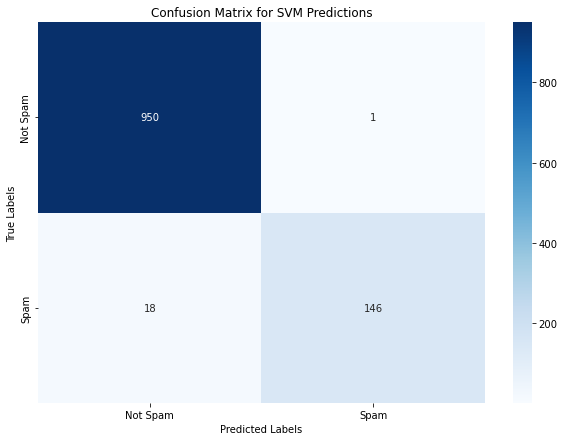

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(x_test['Category'], svm_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Predictions')
plt.show()


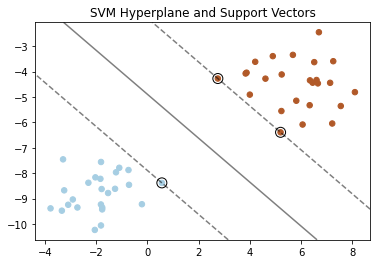

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate a 2D dataset
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)

# Train the SVM
clf = SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot the support vectors (important data points that define the hyperplane)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM Hyperplane and Support Vectors")
plt.show()
